In [1]:
# Import packages


from scipy.interpolate import interp1d
import time
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy.special import erf
from scipy import integrate
from scipy.integrate import quad, dblquad
from scipy.integrate import simps

# Lists of colors for plots

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))



In [2]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

# Import data

In [3]:
filename='CH_Silent_calls.csv'

list_of_syn_vaf=[]
list_of_syn_vaf_after_trimming=[]
list_of_syn_vaf_by_patient={}
untreated_patients={}
all_patients={}
trimming_upper=0.5
phi=2*10**-3
trimming_lower=phi
from collections import defaultdict
                
with open(filename) as data:
    
    reader = csv.DictReader(data,delimiter=',')

    for row in reader:

        patient_id=str(row['DMP_PATIENT_ID'])
        gene=str(row['Gene'])
        variant_class=str(row['VariantClass'])
        vaf=float(row['N_AltFreq'])
        therapy_status=str(row['therapy_binary'])
        age=str(row['age'])
        
            
        all_patients[patient_id] =  age   #ages of some treated patients are unavailable
        
        if therapy_status=='untreated':
            
            #ages of all untreated patients are available
            if age=='NA':
                print('age unavailable')
                age=0
            
            untreated_patients[patient_id] =  float(age)
            
            if variant_class=='Silent':
            
                list_of_syn_vaf.append(vaf)
                
#                 if patient_id == 'P-0003362':
#                     print('Top variant patient harbour syn mutation')

                
                if trimming_upper > vaf >= trimming_lower:
                                    list_of_syn_vaf_after_trimming.append(vaf)
                
                if patient_id not in list_of_syn_vaf_by_patient.keys():
                    list_of_syn_vaf_by_patient[patient_id]=[vaf]
#                     print(type(list_of_syn_vaf_by_patient[patient_id]))
                else:
                    pass
#                     print(list_of_syn_vaf_by_patient)
                    tmp = list_of_syn_vaf_by_patient.get(patient_id,"")
                    
                    tmp.append(vaf)
                    print(patient_id, tmp)


                    list_of_syn_vaf_by_patient[patient_id]=tmp

    
           

n_untreated_patient=len(untreated_patients.keys())
print('total number of synonymous variants is', len(list_of_syn_vaf))
print('total number of synonymous variants after trimming is', len(list_of_syn_vaf_after_trimming))
n_syn_in_selection_regime = 0
for vaf in list_of_syn_vaf_after_trimming:
    if vaf>0.2/100:
        n_syn_in_selection_regime = n_syn_in_selection_regime + 1
print(n_syn_in_selection_regime,'synonymous variants are above drift limit')
print('total number of all patients is', len(all_patients.keys()))
print('total number of untreated patients is', len(untreated_patients.keys()))
print('Silent mutations are found in', len(list_of_syn_vaf_by_patient.keys()), 'untreated patients')
list_of_patient_ages = list(untreated_patients.values())
print('minimum age:', min(list_of_patient_ages), 'maximum age:', max(list_of_patient_ages))
print('minimum VAF is', min(list_of_syn_vaf), 'maximum VAF is', max(list_of_syn_vaf))
# 'P-0019920', 'P-0019980', 'P-0020018', 'P-0020248', 'P-0020452', 'P-0020564'

P-0006175 [0.12796, 0.02273]
P-0009756 [0.03512, 0.08496]
P-0009756 [0.03512, 0.08496, 0.03109]
P-0014172 [0.26526, 0.23971]
P-0014240 [0.14026, 0.05199]
P-0016571 [0.05122, 0.04499]
P-0016809 [0.30435, 0.02378]
P-0017361 [0.0233, 0.02548]
P-0017194 [0.12109, 0.02496]
P-0017194 [0.12109, 0.02496, 0.02635]
P-0017194 [0.12109, 0.02496, 0.02635, 0.10731]
P-0017194 [0.12109, 0.02496, 0.02635, 0.10731, 0.12855]
P-0017194 [0.12109, 0.02496, 0.02635, 0.10731, 0.12855, 0.11954]
P-0019214 [0.0471, 0.25884]
P-0019298 [0.03299, 0.03768]
P-0020944 [0.0408, 0.03524]
P-0020922 [0.03033, 0.0273]
P-0021116 [0.02571, 0.05178]
P-0022568 [0.02658, 0.0267]
P-0022687 [0.02703, 0.02151]
P-0018106 [0.07418, 0.05435]
total number of synonymous variants is 221
total number of synonymous variants after trimming is 221
221 synonymous variants are above drift limit
total number of all patients is 5468
total number of untreated patients is 590
Silent mutations are found in 200 untreated patients
minimum age: 15.39

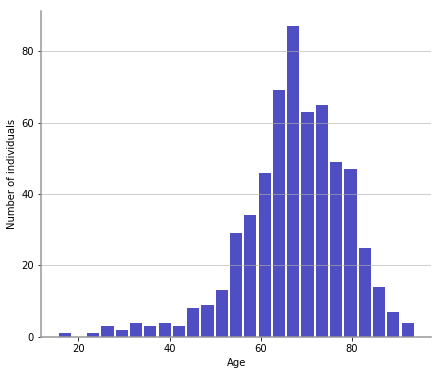

In [4]:
import matplotlib.pyplot as plt

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7,6))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)
 
n, bins, patches = plt.hist(x=list_of_patient_ages, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Number of individuals')


#Only show the required axis lines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(1.5)

for axis in ['bottom','left']:
    ax1.spines[axis].set_color(grey3)
    
# plt.savefig('Bolton_age_distribution.pdf', bbox_inches='tight')

# Define plotting function

In [5]:
Bolton_panel_size = 1139322  # bp
non_syn_mu_per_bp = 1.3617021276595745e-09
synonymous_mu_per_bp = 5.390070921985816e-10
mu_per_bp = 1.9007092198581563e-09
Bolton_468panel_mu = mu_per_bp*Bolton_panel_size
Bolton_468panel_non_syn_mu = non_syn_mu_per_bp*Bolton_panel_size
Bolton_synonymous_mu = synonymous_mu_per_bp*Bolton_panel_size

print('Bolton_468panel_mu', Bolton_468panel_mu)
print('Bolton_468panel_non_syn_mu', Bolton_468panel_non_syn_mu)

Bolton_dev_per_doubling_synonymous_mu_LeeSix = 0.00019816267223880598

Bolton_468panel_mu 0.0021655198297872344
Bolton_468panel_non_syn_mu 0.0015514171914893617


In [6]:
s_tolerance = 3.5/100
print('The DFE has a lower cutt off at s=', s_tolerance)

The DFE has a lower cutt off at s= 0.035


### Define th DFE in healthy blood

In [7]:
# expo power + delta 

# p free
p_inferred = 2.62978687
q_inferred = 0.07713325
ratio_nonneutral = 0.02081683
s_max_inferred = float('inf')
Bolton_468panel_mu = 0.0021655198297872344

# b_inferred = 2.58770579e-01
# d_inferred = 8.87409733e-06
# s_max_inferred = 1.31516655e-01
# ratio_nonneutral = 4.73318255e-01
# Bolton_468panel_mu = 0.0021655198297872344

# p_inferred = 2
# q_inferred = 0.05978819
# ratio_nonneutral = 0.03493328
# s_max_inferred = float('inf')
# Bolton_468panel_mu = 0.0021655198297872344

# p_inferred = 3
# q_inferred = 0.08549349
# ratio_nonneutral = 0.01639539
# s_max_inferred = float('inf')
# Bolton_468panel_mu = 0.0021655198297872344

# p_inferred = 4
# q_inferred = 0.09965129
# ratio_nonneutral = 0.01116841
# s_max_inferred = float('inf')
# Bolton_468panel_mu = 0.0021655198297872344

Bolton_468panel_functional_non_syn_mu = Bolton_468panel_mu*ratio_nonneutral
print('Bolton_468panel_functional_non_syn_mu', Bolton_468panel_functional_non_syn_mu)

Bolton_468panel_functional_non_syn_mu 4.50792581583098e-05


In [8]:
#  theory
import scipy.special as sc
import mpmath as mp

N_tau=10**5


# log concave
# weight_s= lambda s: np.exp(-((abs(s))/d_inferred)**b_inferred)
# normalization=integrate.quad(weight_s, 0.0, s_max_inferred)[0]

# # log convex
weight_s= lambda s: np.exp(-((abs(s))/q_inferred)**p_inferred)
normalization=integrate.quad(weight_s, 0.0, float("inf"))[0]



    
def hitchhikers_major_contribution_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau
    f = np.exp(l)


    lower_limit = (2*N*f/(1-2*f))*s*(N*s-1+np.exp(s*t))*np.exp(-s*t) # is larger than upper_limit
    upper_limit = (2*N*f/(1-2*f))*N*s**2*np.exp(-s*t)

    problematic_large_term_log = np.log((2*N*f/(1-2*f))*N*s**2)+(N*s-1)*(2*N*f/(1-2*f))*s*np.exp(-s*t)-s*t
#         print('problematic_large_term_log',problematic_large_term_log)

    approximate_integral = lambda x: mp.exp( problematic_large_term_log-x)/x
    ok_term = float(mp.quad(approximate_integral, [lower_limit, upper_limit]) )

#     factor of two froun driver mutation diploidy    
    expected_density = 2*(1/(1-2*f))*N**2*u_driver*((np.exp(-(2*N*f/(1-2*f))*s*np.exp(-s*t))-np.exp(-(2*N*f/(1-2*f))*s))\
                                            +ok_term)


    return expected_density

def expected_density_hitchhiker_mutants_s_single(t, l, s1, b, d, mu_ben, N_tau): #s1 = fitness of 1st mutation, s2 = fitness of 2nd mutation

    u_driver_at_s1 = mu_ben*np.exp(-((abs(s1))/d)**b)/normalization


    expected_density_major_contribution = hitchhikers_major_contribution_with_cutoff(l, N_tau, t, u_driver_at_s1, s1)
    
    expected_density_minor_contribution = 2*np.exp(l)*N_tau*u_driver_at_s1/(np.exp(l)*s1*(1-2*np.exp(l)))*(-s1*t*np.exp(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*s1)+sc.expi(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*s1) -\
                                                   sc.expi(-(2*N_tau*np.exp(l)/(1-2*np.exp(l)))*s1*np.exp(-s1*t)))
    
    expected_density = (expected_density_major_contribution + expected_density_minor_contribution)
    
    return expected_density

def expected_number_hitchhiker_mutants(t, l, b, d, mu_ben, s_lower, s_upper, N_tau):
    
    result = integrate.quad(lambda s_var: expected_density_hitchhiker_mutants_s_single(t,  l, s_var,\
                                                                        b, d, mu_ben, N_tau), s_lower, s_upper)[0]

    return result

def logProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
#     s_max = params[2]
    mu_ben= params[2]
    
    age_bins_positions=np.linspace(0,100,21)
    hist, bins =np.histogram(list_of_control_ages, bins=age_bins_positions)
    bin_centres = (bins[:-1] + bins[1:])/2

    for i in range(len(bin_centres)):
        age = bin_centres[i]
        number_of_people = hist[i]
        if number_of_people!=0:
            total_density= total_density + expected_number_hitchhiker_mutants(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)*number_of_people/len(list_of_control_ages)

    
    return np.log(total_density)

def linProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages): #= predicted density (i.e. normalised by 2 x mu)
    "Natural log of the probability of observing a variant within a specific binwidth if able to sequence perfectly"
    total_density=0.0
    
    b = params[0] 
    d = params[1]
#     s_max = params[2]
    mu_ben= params[2]
    
    age_bins_positions=np.linspace(0,100,21)
    hist, bins =np.histogram(list_of_control_ages, bins=age_bins_positions)
    bin_centres = (bins[:-1] + bins[1:])/2

    for i in range(len(bin_centres)):
        age = bin_centres[i]
        number_of_people = hist[i]
        if number_of_people!=0:
            total_density= total_density + expected_number_hitchhiker_mutants(age, l, b, d, mu_ben, s_lower, s_upper, N_tau)*number_of_people/len(list_of_control_ages)

    
    return total_density


In [9]:
 
def logProbtheory_ages_dev(l, u_dev, u_norm): # u_norm and target_size are the neutral mutation rates and the target size in the corresponding study

    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return np.log(density)

def linProbtheory_ages_dev(l, u_dev, u_norm): # u_norm and target_size are the neutral mutation rates and the target size in the corresponding study

    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return density



# Age breakdown

In [10]:

n_patient_younger=0
n_patient_older=0
n_patient_all=0
list_of_syn_VAF_younger=[]
list_of_syn_VAF_older=[]
list_of_syn_VAF_all=[]
list_of_ages_younger=[]
list_of_ages_older=[]


dividing_age = 67.5
print('min age:', min(untreated_patients.values()), 'max age:', max(untreated_patients.values()), 'dividing_age ',dividing_age )
print('total number of untreated patients is', len(list_of_syn_vaf_by_patient.items()))


for patient_id, age in untreated_patients.items():
    
    n_patient_all = n_patient_all + 1

    if patient_id in list_of_syn_vaf_by_patient.keys():
        list_vaf=list_of_syn_vaf_by_patient[patient_id]
    else:
        list_vaf=[]
        
    for i in list_vaf:
        list_of_syn_VAF_all.append(i)

    if age < 75:
        n_patient_younger = n_patient_younger + 1
        list_of_ages_younger.append(age)
#         if list_vaf !=[]:
        for i in list_vaf:
            list_of_syn_VAF_younger.append(i)

    if 75 <= age:
        n_patient_older = n_patient_older + 1
        list_of_ages_older.append(age)
        for i in list_vaf:
            list_of_syn_VAF_older.append(i)
  
    
        
color_younger = blue4
color_older = blue5

print('no of patients in younger age group:', n_patient_younger, 'no of patients in older age group:', n_patient_older)
print('no of variants in younger age group:', len(list_of_syn_VAF_younger), 'no of variants in older age group:', len(list_of_syn_VAF_older))
print('no. of all patients',n_patient_all)

min age: 15.3922 max age: 93.81519 dividing_age  67.5
total number of untreated patients is 200
no of patients in younger age group: 444 no of patients in older age group: 146
no of variants in younger age group: 157 no of variants in older age group: 64
no. of all patients 590


In [11]:
def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err

def plot_log_hist_data_for_plot_synonymous_rcumulative_not_divided_by_binsize(study_VAFs, study_total, u_syn, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale):
    # study_VAFs is a list of strings
    
     #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*2*u_syn
    hist, bins = np.histogram(log_VAFs,  bins=np.linspace(lmin, lmax, n_bins))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2

    width_scalar=widths[0]
    hist=np.cumsum(hist[::-1])[::-1]
    normalised_hist = hist/(normed_value)
#     normalised_hist = hist/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=3)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    print('min(log_hist_for_plot)',min(log_hist_for_plot))
    print('max(log_hist_for_plot)',max(log_hist_for_plot))

    ax1.set_xlim(np.log(10**-3), 0)

    

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]

                    
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]

                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)
    
    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = 20, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('reverse cumulative density', fontsize = 20, labelpad = 6*scale, fontweight = 'medium')

    y_major_ticks = [np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)\
                    , np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),\
                    np.log(7000000),np.log(8000000),np.log(9000000),np.log(10000000)\
                    , np.log(20000000),np.log(30000000),np.log(40000000),np.log(50000000),np.log(60000000),\
                    np.log(70000000),np.log(80000000),np.log(90000000),np.log(100000000)]
    y_major_ticks = [c-np.log(10**3) for c in y_major_ticks]
    y_major_tick_labels = ["" ,"", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", \
                           "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$"\
                          ,"", "", "", "", "", "", "", "", "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1


log_hist_for_plot is [5.72024146 5.27790582 4.32941195 3.41312122 2.26798891]
errors is [(0.06963659227318875, 0.08764954693639915, 0.1448407862625114, 0.2397821029348699, 0.47475807052558183), (0.06510143710779737, 0.08058237971330673, 0.12649164759431475, 0.19326208729997685, 0.3206073906983238)]
min(log_hist_for_plot) 2.267988912031387
max(log_hist_for_plot) 5.720241464493826
log_hist_for_plot is [5.66262254 5.24110573 4.13273726 3.09128339 1.9926711 ]
errors is [(0.08317368321662677, 0.10373176259256223, 0.18813673438313216, 0.3406260401632655, 0.6931471805599452), (0.07678388511785528, 0.09397558764719705, 0.1582837712334504, 0.2536146631736358, 0.4054651081081646)]
min(log_hist_for_plot) 1.9926710985635048
max(log_hist_for_plot) 5.662622542791922
log_hist_for_plot is [5.87747776 5.38215632 4.76311712 4.02117977 2.81720697]
errors is [(0.13353139262452274, 0.17450596283753228, 0.24617920927727344, 0.3801304080661714, 0.8612115025164906), (0.11778303565638382, 0.14853047643427075, 

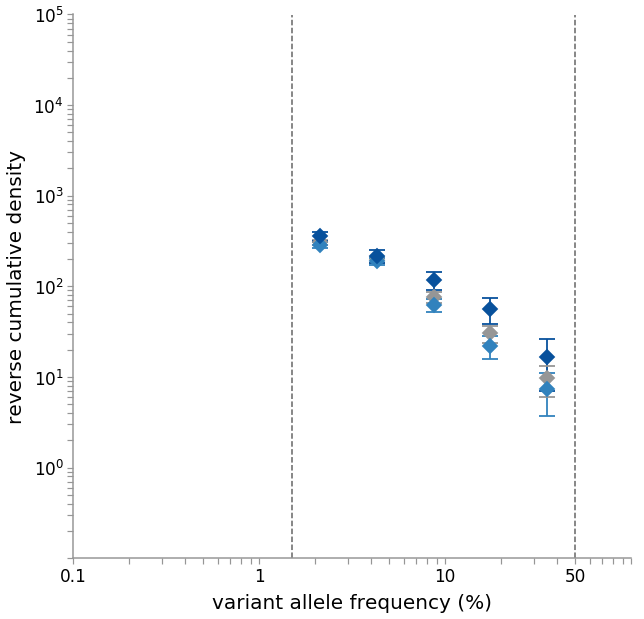

In [12]:
plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

import timeit

start = timeit.default_timer()


#linear binning : same bins and limits in the same simulation with same alpha
Bolton_synonymous_bins_above_lmin = 6
lmax=np.log(0.499)
lmin_Bolton=np.log(1.5/100)

fmin=np.exp(lmin_Bolton)
fmax=np.exp(lmax)

binsize = 0.7009111789298618
l_max_rcum=-0.6951491832306185  # carried from best-fitting with Bolton data
lmin_syn = -3.8492494884149964-binsize/2

linear_VAF=np.linspace(fmin, fmax, 30)
log_VAF=np.linspace(lmin_syn, l_max_rcum, 30)
 
scale=1.2
    
plot_log_hist_data_for_plot_synonymous_rcumulative_not_divided_by_binsize(list_of_syn_VAF_all, n_patient_all, Bolton_synonymous_mu,\
                                                            Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax, 'all',\
                                                           'D', 10, grey3, scale)

plot_log_hist_data_for_plot_synonymous_rcumulative_not_divided_by_binsize(list_of_syn_VAF_younger, n_patient_younger, Bolton_synonymous_mu,\
                                                            Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax, 'younger',\
                                                           'D', 10, color_younger, scale)

plot_log_hist_data_for_plot_synonymous_rcumulative_not_divided_by_binsize(list_of_syn_VAF_older, n_patient_older, Bolton_synonymous_mu,\
                                                            Bolton_synonymous_bins_above_lmin, lmin_Bolton, lmax, 'older',\
                                                           'D', 10, color_older, scale)
ax1.axvline(x=l_max_rcum, color =grey4, linestyle='--')
ax1.axvline(x=lmin_syn, color =grey4, linestyle='--')

def hitchhiker_prediction_overall(l, params, N_tau, s_lower, s_upper, u_dev, u_neu, list_of_control_ages):
        
    summed_result = linProbtheory_actual_ages_hitch(l, params, N_tau, s_lower, s_upper, list_of_control_ages)+\
    linProbtheory_ages_dev(l, u_dev, u_neu)
    
    return summed_result

def rcum_hitchhiker_prediction_overall(l,l_max_rcum, params, N_tau, s_lower, s_upper, u_dev, u_neu, list_of_control_ages):

    result = integrate.quad(lambda l_var: hitchhiker_prediction_overall(l_var, params, N_tau, s_lower, s_upper, u_dev, u_neu, list_of_control_ages), l, l_max_rcum)[0]

    return result

best_fit_u = 0.00029343749999999927   # from best-fitting

s_max_inferred=1
density_hitchhiker_bestfit_combined_rcumulative_log=[]
for l in log_VAF:
    tmp=np.log(rcum_hitchhiker_prediction_overall(l-binsize/2, l_max_rcum , [p_inferred, q_inferred, best_fit_u], N_tau, s_tolerance, s_max_inferred, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu, list_of_patient_ages)) 
    density_hitchhiker_bestfit_combined_rcumulative_log.append(tmp)
    print('tmp:',tmp, 'at l:', l)
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    start=stop

print('density_hitchhiker_bestfit_combined_rcumulative_log',density_hitchhiker_bestfit_combined_rcumulative_log)
ax1.plot(log_VAF, density_hitchhiker_bestfit_combined_rcumulative_log, color=grey3, lw=4, zorder=2, label='')

density_hitchhiker_bestfit_older_rcumulative_log=[]
for l in log_VAF:
    tmp=np.log(rcum_hitchhiker_prediction_overall(l-binsize/2, l_max_rcum , [p_inferred, q_inferred, best_fit_u], N_tau, s_tolerance, s_max_inferred, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu, list_of_ages_older)) 
    density_hitchhiker_bestfit_older_rcumulative_log.append(tmp)
    print('tmp:',tmp, 'at l:', l)
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    start=stop

print('density_hitchhiker_bestfit_older_rcumulative_log',density_hitchhiker_bestfit_older_rcumulative_log)
ax1.plot(log_VAF, density_hitchhiker_bestfit_older_rcumulative_log, color=color_older, lw=4, zorder=2, label='')

density_hitchhiker_bestfit_younger_rcumulative_log=[]
for l in log_VAF:
    tmp=np.log(rcum_hitchhiker_prediction_overall(l-binsize/2, l_max_rcum , [p_inferred, q_inferred, best_fit_u], N_tau, s_tolerance, s_max_inferred, Bolton_dev_per_doubling_synonymous_mu_LeeSix, Bolton_synonymous_mu, list_of_ages_younger)) 
    density_hitchhiker_bestfit_younger_rcumulative_log.append(tmp)
    print('tmp:',tmp, 'at l:', l)
    stop = timeit.default_timer()
    print('Time: ', stop - start)
    start=stop
    
print('density_hitchhiker_bestfit_younger_rcumulative_log',density_hitchhiker_bestfit_younger_rcumulative_log)
ax1.plot(log_VAF, density_hitchhiker_bestfit_younger_rcumulative_log, color=color_younger, lw=4, zorder=2, label='')



# plt.savefig('age_dependence_healthy_blood_Bolton.pdf',bbox_inches='tight')

### Stored results 

In [ ]:
# corrected bin size and split set to exhaustive half: <75 versus >=75
# for log_VAF=np.linspace(lmin_syn, l_max_rcum, 30)


density_hitchhiker_bestfit_older_rcumulative_log = [7.382041389942493, 7.2483269898771665, 7.113449292371321, 6.977337165850994, 6.839908450678712, 6.7010688644234015, 6.560710529323652, 6.418710030062774, 6.274925910784785, 6.12919551300384,\
                                                  5.98133102885338, 5.831114577598883, 5.678292052342676, 5.522565362286971, 5.363582560315432, 5.200925117321909, 5.034091299716162, 4.862474119774215, 4.685331576437118, 4.501745709337406,\
                                                  4.310564988531909, 4.110321189806723, 3.8991058420432463, 3.674380136490186, 3.432670075116183, 3.1690523668138857, 2.876231322502242, 2.5427424860747836, 2.1490595362253084, 1.6577633819286284]



density_hitchhiker_bestfit_younger_rcumulative_log = [5.45577559681559, 5.297324928721917, 5.137337654806314, 4.975727497601078, 4.812398898605609, 4.647245802631153, 4.480149927901811, 4.3109785533472085,\
                                                    4.139581784308756, 3.9657892267509793, 3.789405964884023, 3.6102076231374323, 3.4279342889057443, 3.242282926801602, 3.0528978339921227, 2.859358455641789,\
                                                    2.6611636501153106, 2.457711054816736, 2.2482695900385306, 2.0319421283990176,\
                                                    1.8076137284922174, 1.5738781263477741, 1.328930338731279, 1.0704045504544455, 0.7951195170580482, 0.4986590967023755, 0.1746383286520229, -0.18668400665010287, -0.6013165984215533, -1.09862848303884]



                                    
# for log_VAF=np.linspace(lmin_Bolton, lmax, 50)

density_hitchhiker_bestfit_combined_rcumulative_log = [6.352292016996418, 6.268833088164051, 6.184982430901165, 6.100726555380198, 6.0160508020881185, 5.930939283783243, 5.845374809983211, 5.759338799912488, 5.672811173745383, 5.585770227138633, 5.4981924835121365, 5.410052526975108, 5.321322807717292, 5.231973422651523, 5.141971868030181, 5.051282753771913, 4.959867488100435, 4.867683910054549, 4.774685879326915, 4.680822802843936, 4.586039100102315, 4.4902735778313305, 4.393458721227954, 4.295519863364659, 4.196374224488425, 4.095929787790367, 3.994083972672836, 3.890722075810014, 3.785715409974909, 3.6789190787622266, 3.570169298761194, 3.459280145057944, 3.346039570817112, 3.23020449758461, 3.1114946993171504, 2.9895851034396315, 2.8640959988669445, 2.734580418067405, 2.600507664360638, 2.4612414620334913, 2.3160105068648615, 2.163867966274447, 2.0036345988410846, 1.8338167985643707, 1.6524850641715105, 1.4570874976527988, 1.2441516639851335, 1.0087837557379018, 0.743773552191003, 0.43786283361090683]
